<a href="https://colab.research.google.com/github/daniel-nuno/time_series_O2024_MAF3074N/blob/main/visualizaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

<br>
<br>
Clase: Series de tiempo
<br>
Actividad: Time series graphics
<br>
<br>

* * *

Docente: Daniel Nuño <br>
Fecha: 26 de Agosto 2024 <br>

* * *

<br>
<br>

# Time series graphics

Lo primero que hay que hacer en cualquier tarea de análisis de datos es representarlos gráficamente. Los gráficos permiten visualizar muchas características de los datos, como patrones, observaciones inusuales, cambios a lo largo del tiempo y relaciones entre variables. Las características que se observan en los gráficos de los datos deben incorporarse, en la medida de lo posible, a los métodos de pronóstico que se vayan a utilizar.


## Importar datos y librerías

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/series_tiempo/Assets/remesas banxico.xlsx")

In [ ]:
data.head()

,Fecha,Value
0,1995-01-01,254.5724
1,1995-02-01,248.0605
2,1995-03-01,287.3645
3,1995-04-01,298.9135
4,1995-05-01,357.7396


In [ ]:
data.dtypes

,0
Fecha,datetime64[ns]
Value,float64


In [ ]:
data.index = pd.to_datetime(data['Fecha'])

In [ ]:
del data['Fecha']
data.head()

,Value
Fecha,
1995-01-01,254.5724
1995-02-01,248.0605
1995-03-01,287.3645
1995-04-01,298.9135
1995-05-01,357.7396


In [ ]:
data.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Fecha', length=348, freq=None)

Text(0.5, 1.0, 'Remesas Banxico 1995 - 2023')

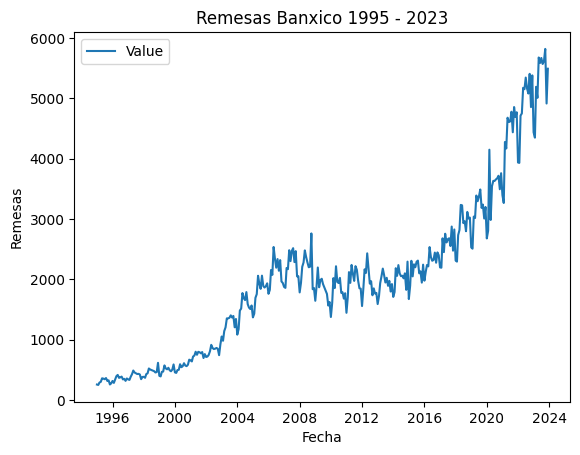

In [ ]:
sns.lineplot(data = data)
plt.ylabel("Remesas")
plt.xlabel("Fecha")
plt.title("Remesas Banxico 1995 - 2023")

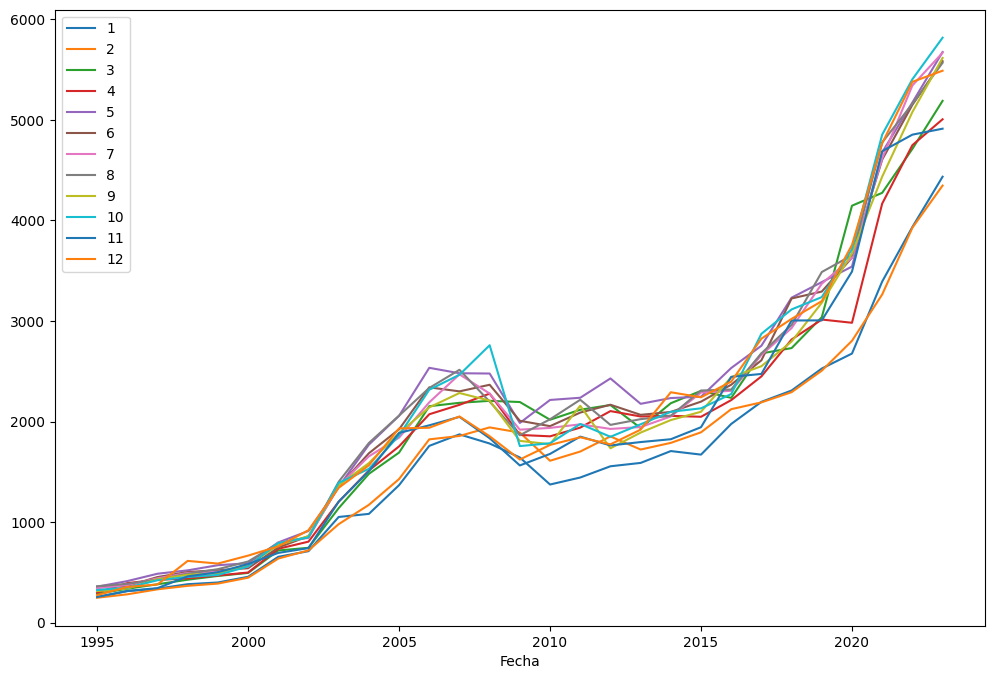

In [ ]:
    piv_index = getattr(data.index, 'year')
    piv_season = getattr(data.index, 'month')

    piv = pd.pivot_table(data, index=piv_index, columns=piv_season, values=data)
    piv.plot(figsize=(12,8))
    plt.legend(pd.unique(piv_season))

<Axes: xlabel='Fecha'>

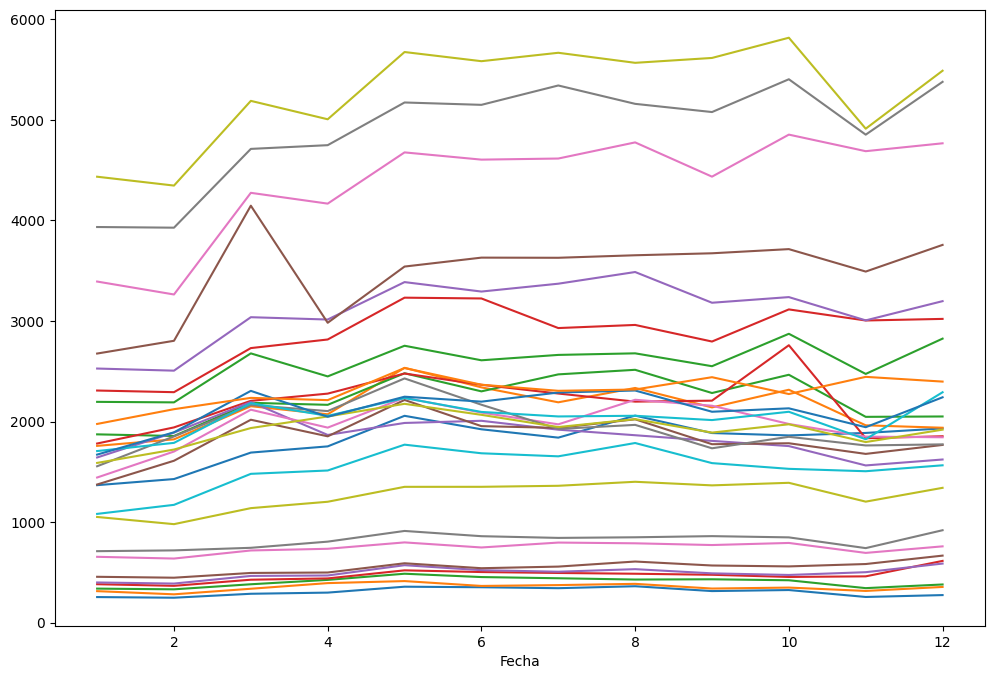

In [ ]:
    piv = pd.pivot_table(data, index=piv_season, columns=piv_index, values=data)
    piv.plot(figsize=(12,8), legend = False)

In [ ]:
piv.head()

Value                                                              \
Fecha      1995      1996      1997      1998      1999      2000      2001   
Fecha                                                                         
1      254.5724  313.5091  338.6477  382.5317  399.6423  456.2456  654.9820   
2      248.0605  281.9257  331.5918  366.3982  388.8511  447.1870  637.6737   
3      287.3645  337.3185  381.9072  427.1949  464.8977  494.4502  718.0550   
4      298.9135  393.3877  425.5386  439.9950  469.1828  498.8308  734.8058   
5      357.7396  413.5420  486.6894  520.3739  571.5620  590.7496  798.2438   

                                      ...                                   \
Fecha     2002       2003       2004  ...       2014       2015       2016   
Fecha                                 ...                                    
1      711.043  1051.2547  1081.8635  ...  1706.7546  1671.4057  1976.3992   
2      718.865   979.7597  1171.7737  ...  1788.2090  1893.1655  2123.2210   
3      744.527  1139.1124  1480.2240  ...  2182.6248  2305.4392  2235.7849   
4      805.872  1202.5097  1513.5151  ...  2056.9042  2047.7711  2213.3934   
5      912.205  1350.9669  1770.3978  ...  2234.0545  2247.4372  2532.8538   

                                                                         \
Fecha       2017       2018       2019       2020       2021       2022   
Fecha                                                                     
1      2196.0865  2308.8292  2527.5581  2676.6263  3392.8085  3935.0868   
2      2191.0386  2292.3587  2506.4369  2803.4988  3264.1015  3928.4852   
3      2678.2118  2730.9501  3038.1022  4147.1146  4275.0937  4712.0937   
4      2449.3006  2816.4145  3014.8781  2982.6531  4167.7596  4749.1098   
5      2754.1658  3232.3766  3387.2534  3541.8263  4677.3251  5173.7153   

                  
Fecha       2023  
Fecha             
1      4435.4259  
2      4347.2494  
3      5189.7692  
4      5006.6693  
5      5675.5604  

[5 rows x 29 columns]

([], [])

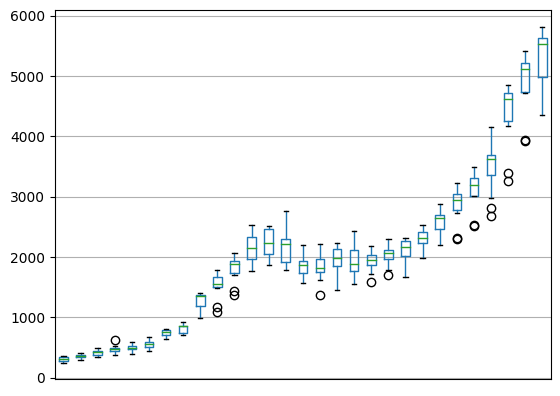

In [ ]:
piv.boxplot()
plt.xticks([])

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot

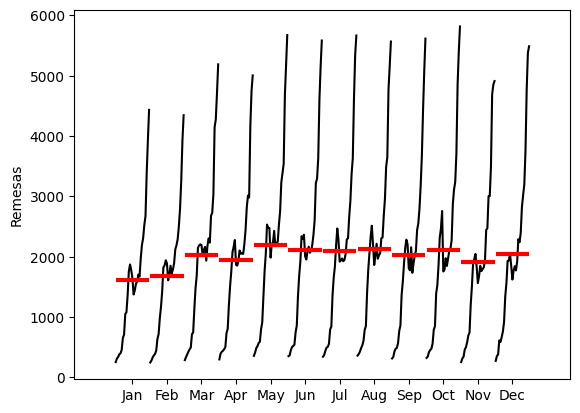

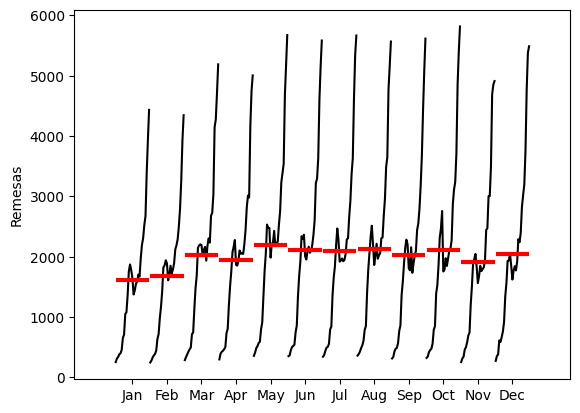

In [ ]:
month_plot(data, ylabel='Remesas')

array([[<Axes: xlabel='Value', ylabel='Value'>]], dtype=object)

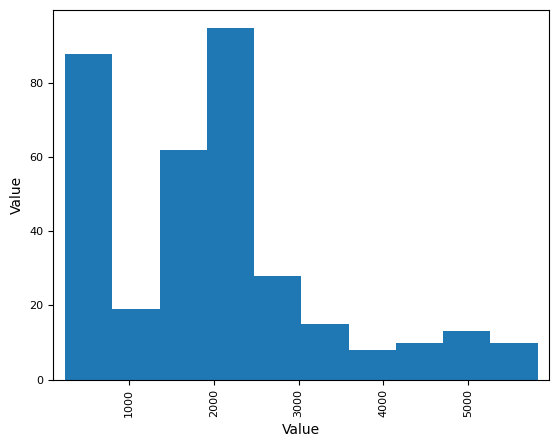

In [ ]:
pd.plotting.scatter_matrix(data)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

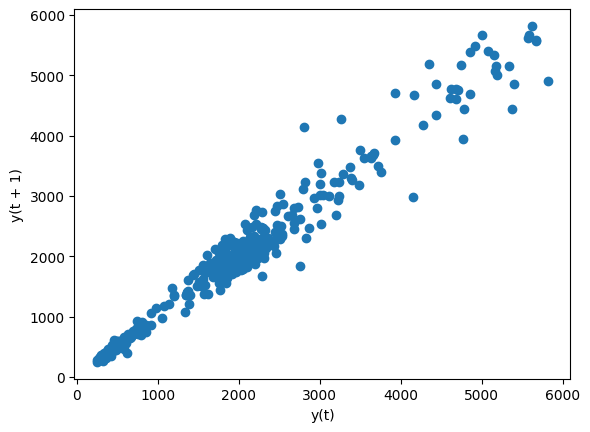

In [ ]:
from pandas.plotting import lag_plot
lag_plot(data, lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 2)'>

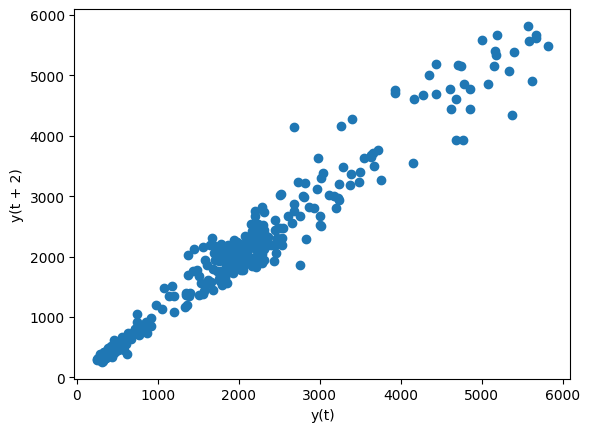

In [ ]:
lag_plot(data, lag=2)

<Axes: xlabel='y(t)', ylabel='y(t + 6)'>

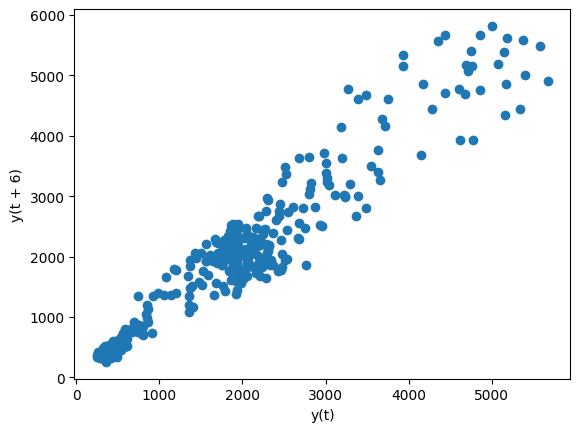

In [ ]:
lag_plot(data, lag=6)

<Axes: xlabel='y(t)', ylabel='y(t + 12)'>

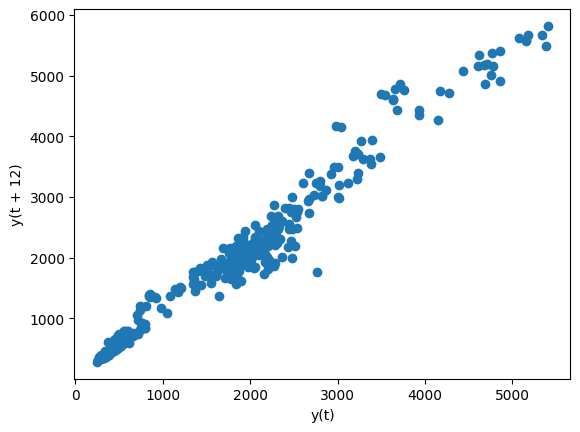

In [ ]:
lag_plot(data, lag=12)

<Axes: xlabel='y(t)', ylabel='y(t + 13)'>

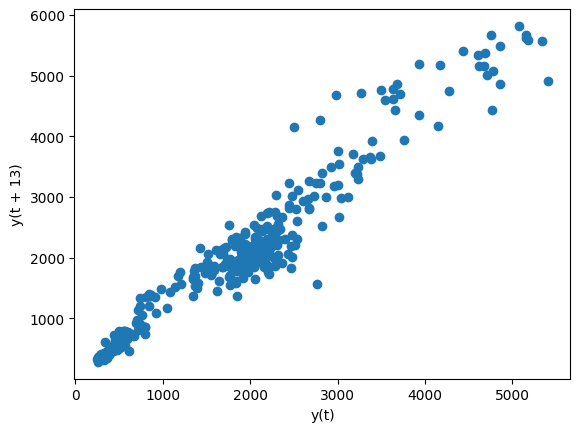

In [ ]:
lag_plot(data, lag=13)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

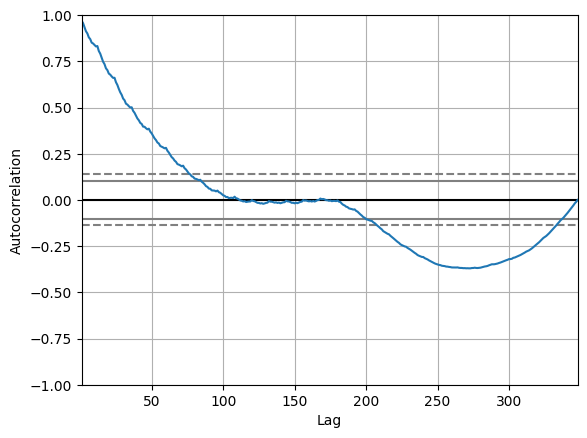

In [ ]:
pd.plotting.autocorrelation_plot(data)

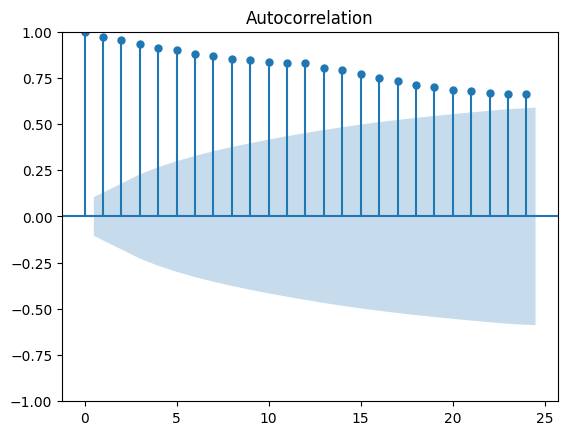

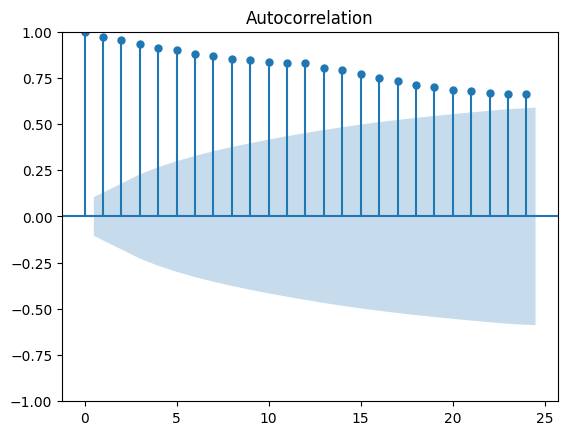

In [ ]:
plot_acf(data, lags=24)

## Descomposición
### Clasica aditiva y multiplicativa

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Fecha
1995-01-01   NaN
1995-02-01   NaN
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
              ..
2023-08-01   NaN
2023-09-01   NaN
2023-10-01   NaN
2023-11-01   NaN
2023-12-01   NaN
Name: trend, Length: 348, dtype: float64
Fecha
1995-01-01   -303.044914
1995-02-01   -258.462228
1995-03-01     85.246471
1995-04-01    -12.125025
1995-05-01    236.746346
                 ...    
2023-08-01    115.058949
2023-09-01     -1.026287
2023-10-01     64.345540
2023-11-01   -124.488780
2023-12-01    -21.531259
Name: seasonal, Length: 348, dtype: float64
Fecha
1995-01-01   NaN
1995-02-01   NaN
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
              ..
2023-08-01   NaN
2023-09-01   NaN
2023-10-01   NaN
2023-11-01   NaN
2023-12-01   NaN
Name: resid, Length: 348, dtype: float64
Fecha
1995-01-01     254.5724
1995-02-01     248.0605
1995-03-01     287.3645
1995-04-01     298.9135
1995-05-01     357.7396
                ...    
2023-08-01    5568.2127
2023-09-01    5616.6566
2023-10-0

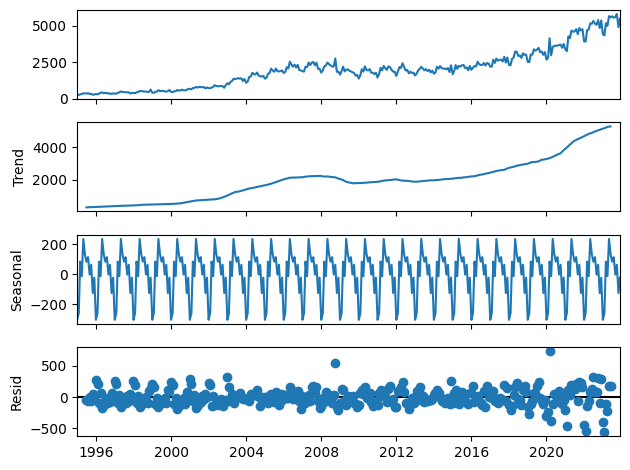

In [ ]:
from matplotlib import pyplot
result = seasonal_decompose(data, model='additive')
result.plot()
pyplot.show()

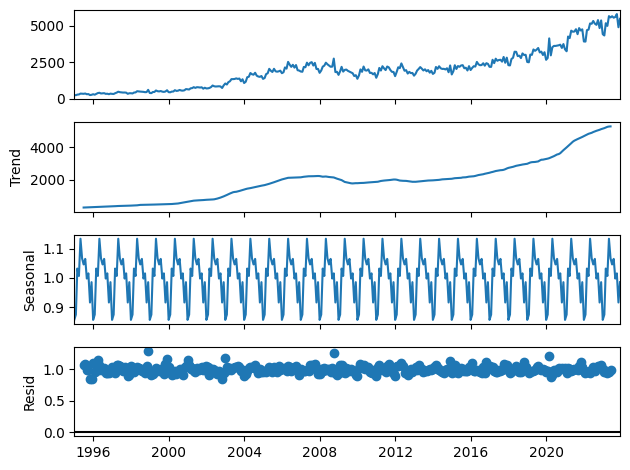

In [ ]:
result = seasonal_decompose(data, model='multiplicative')
result.plot()
pyplot.show()

### STL

https://www.statsmodels.org/dev/examples/notebooks/generated/stl_decomposition.html


https://www.gardner.fyi/blog/STL-Part-II/


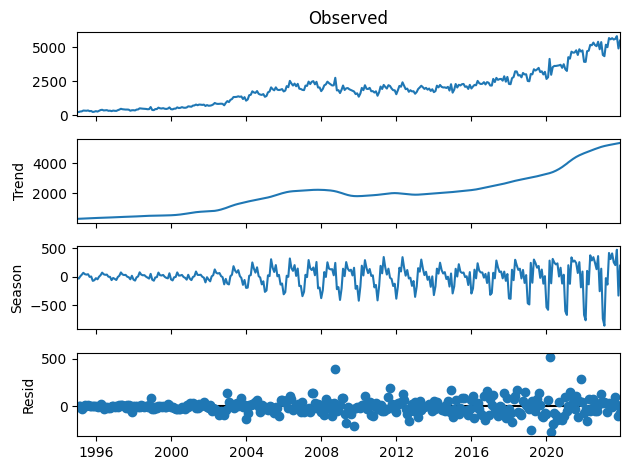

In [ ]:
from statsmodels.tsa.seasonal import STL

stl = STL(data)
res = stl.fit()
fig = res.plot()

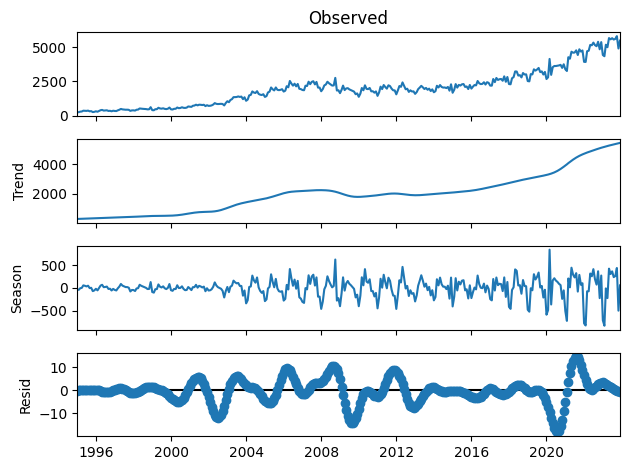

In [ ]:
stl = STL(data, seasonal=3, trend = 13)
res = stl.fit()
fig = res.plot()

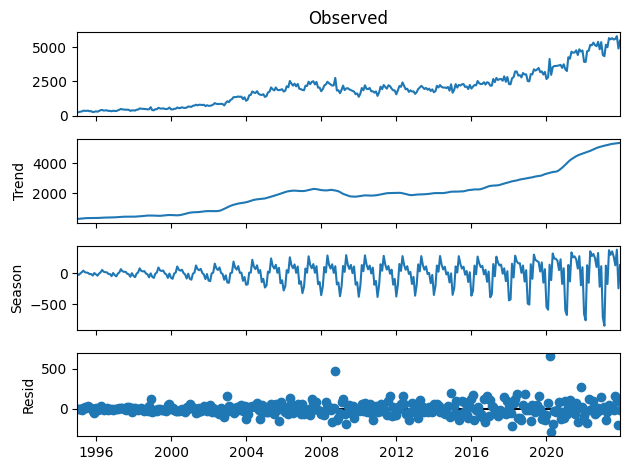

In [ ]:
stl = STL(data, seasonal=13, trend = 13)
res = stl.fit()
fig = res.plot()

## Características y Estadística



In [ ]:
data.describe()

,Value
count,348.000000
mean,1993.306029
std,1313.988198
min,248.060500
25%,797.831625
50%,1933.930150
75%,2453.371275
max,5817.827200


In [ ]:
data.skew()

,0
Value,0.901098


In [ ]:
data.kurtosis()

,0
Value,0.564242


Características ACF y STL seran discutidas en un futuro

## Pronósticos simples

Utliza statsforecast https://nixtlaverse.nixtla.io/statsforecast/index.html

In [ ]:
pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.7/196.7 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 11.8 MB/s eta 0:00:00


In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import __all__

In [ ]:
from statsforecast.models import HistoricAverage

# Define the model, fit and predict:
model = HistoricAverage()
model = model.fit(y=data.values)
y_hat_dict = model.predict(h=1)

y_hat_dict

{'mean': array([1993.306], dtype=float32)}

In [ ]:
pip install tsfel

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 26.5 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
import tsfel
#cfg = tsfel.get_features_by_domain('statistical')
cfg = tsfel.get_features_by_domain('temporal')
#cfg = tsfel.get_features_by_domain('spectral')
features = tsfel.time_series_features_extractor(cfg, data )

<ipython-input-71-618c4af46c74>:5: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data )


In [ ]:
features

,Value_Area under the curve,Value_Autocorrelation,Value_Centroid,Value_Mean absolute diff,Value_Mean diff,Value_Median absolute diff,Value_Median diff,Value_Negative turning points,Value_Neighbourhood peaks,Value_Positive turning points,Value_Signal distance,Value_Slope,Value_Sum absolute diff,Value_Zero crossing rate
0,6907.9836,55.0,2.711998,159.920128,15.086833,88.7962,6.7266,113.0,12.0,112.0,55498.523257,11.852908,55492.2844,0.0


In [ ]:
features.columns

Index(['Value_Area under the curve', 'Value_Autocorrelation', 'Value_Centroid',
       'Value_Mean absolute diff', 'Value_Mean diff',
       'Value_Median absolute diff', 'Value_Median diff',
       'Value_Negative turning points', 'Value_Neighbourhood peaks',
       'Value_Positive turning points', 'Value_Signal distance', 'Value_Slope',
       'Value_Sum absolute diff', 'Value_Zero crossing rate'],
      dtype='object')